### 개인 Survey 결과를 토대로 유사한 클래스메이트 끼리 군집화 한다. 
* 사용 Feature : 패션을 나태내는 Feature만을 사용한다. 
 * 상의옷색상 / 하의옷색상 / 하의옷종류 / 신발색상 / 신발종류
* Hierarchical Clustering으로 한다. 
---

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 10
%matplotlib inline

### 데이터 로드 

In [9]:
dataset_path = './resource/class-survey-sample.csv'

survey_ds = pd.read_csv(dataset_path)
survey_ds.head()

,타임스탬프,닉네임,직업,성별,나이,복장,상의옷색상,하의옷색상,하의옷종류,신발색상,신발종류,사는곳,전공,실습환경OS
0,2017. 10. 16 오전 5:57:16,닉1,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS
1,2017. 10. 16 오전 5:57:16,닉2,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS
2,2017. 10. 16 오전 5:57:16,닉3,대학생,남,20,평상복,흰색,노랑,청바지,흰색,구두,강남,컴공,맥OS
3,2017. 10. 16 오전 5:57:16,닉4,대학생,남,20,평상복,흰색,노랑,청바지,흰색,구두,강남,컴공,맥OS
4,2017. 10. 16 오전 5:57:16,닉5,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS


### 군집화 하기 
* Feature 선택
* Label Encoding : string to number 

In [10]:
feature_columns = ['닉네임', '복장','상의옷색상','하의옷색상','하의옷종류','신발색상','신발종류']
feature_ds = survey_ds[feature_columns]

In [11]:
feature_ds.set_index('닉네임', inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict

In [14]:
# label encoding 
le_enc_dict = defaultdict(LabelEncoder)
le_feature_ds = feature_ds.apply(lambda x:le_enc_dict[x.name].fit_transform(x))

In [109]:
le_feature_ds.head()

,복장,상의옷색상,하의옷색상,하의옷종류,신발색상,신발종류
닉네임,,,,,,
닉1,2,5,4,2,3,0
닉2,2,5,4,2,3,0
닉3,2,5,1,2,3,0
닉4,2,5,1,2,3,0
닉5,2,5,4,2,3,0


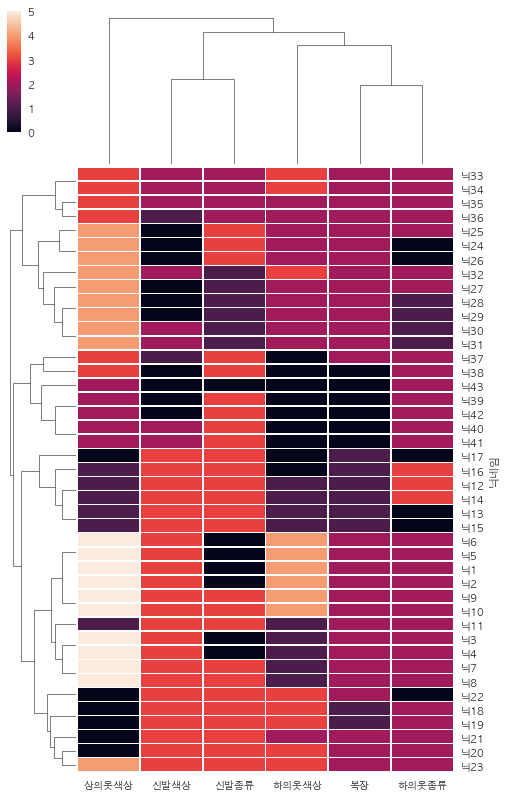

In [123]:
sns.set(style="whitegrid", rc={'font.family':'AppleGothic'}, font_scale=1)
g = sns.clustermap(le_feature_ds, figsize=(8,14), metric='jaccard', linewidths=.5)

[]